In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [4]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
data.shape

(8425, 23)

In [7]:
data.dropna(subset=['Rainfall','RainTomorrow'],axis=0)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [12]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [13]:
data.dropna(subset=['Rainfall','RainTomorrow'],inplace=True)

In [14]:
data.isnull().sum()

Date                0
Location            0
MinTemp            48
MaxTemp            34
Rainfall            0
Evaporation      3377
Sunshine         3839
WindGustDir       945
WindGustSpeed     945
WindDir9am        795
WindDir3pm        283
WindSpeed9am       49
WindSpeed3pm       83
Humidity9am        36
Humidity3pm        80
Pressure9am      1285
Pressure3pm      1286
Cloud9am         2207
Cloud3pm         2247
Temp9am            33
Temp3pm            74
RainToday           0
RainTomorrow        0
dtype: int64

In [15]:
data.dropna(subset=['Evaporation','Sunshine','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm'],inplace=True)

In [16]:
data.isnull().sum()

Date              0
Location          0
MinTemp           1
MaxTemp           1
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      57
WindGustSpeed    57
WindDir9am       64
WindDir3pm       15
WindSpeed9am      1
WindSpeed3pm      1
Humidity9am       2
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           2
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [17]:
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())

In [18]:
data.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           1
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      57
WindGustSpeed    57
WindDir9am       64
WindDir3pm       15
WindSpeed9am      1
WindSpeed3pm      1
Humidity9am       2
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           2
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [22]:
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode())
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode())
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())

In [23]:
data.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      57
WindGustSpeed     0
WindDir9am       64
WindDir3pm       15
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       2
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           2
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [24]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode())

In [25]:
data.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      57
WindGustSpeed     0
WindDir9am       64
WindDir3pm       15
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       2
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           2
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
data['WindGustDir']=le.fit_transform(data['WindGustDir'])

In [29]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode())

In [30]:
data.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am       64
WindDir3pm       15
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       2
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           2
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [31]:
data['WindDir9am']=le.fit_transform(data['WindDir9am'])

In [32]:
data['WindDir3pm']=le.fit_transform(data['WindDir3pm'])

In [33]:
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode())
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode())

In [34]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      2
Humidity3pm      2
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          2
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [35]:
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())

In [36]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [40]:
data['MinTemp'] = data['MinTemp'].astype(int)
data['MaxTemp'] = data['MaxTemp'].astype(int)
data['Rainfall'] = data['Rainfall'].astype(int)
data['Evaporation'] = data['Evaporation'].astype(int)
data['Sunshine'] = data['Sunshine'].astype(int)
data['WindGustSpeed'] = data['WindGustSpeed'].astype(int)
data['WindSpeed9am'] = data['WindSpeed9am'].astype(int)
data['WindSpeed3pm'] = data['WindSpeed3pm'].astype(int)
data['Humidity9am'] = data['Humidity9am'].astype(int)
data['Humidity3pm'] = data['Humidity3pm'].astype(int)
data['Pressure9am'] = data['Pressure9am'].astype(int)
data['Pressure3pm'] = data['Pressure3pm'].astype(int)
data['Cloud9am'] = data['Cloud9am'].astype(int)
data['Cloud3pm'] = data['Cloud3pm'].astype(int)
data['Temp9am'] = data['Temp9am'].astype(int)
data['Temp3pm'] = data['Temp3pm'].astype(int)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 907 to 8385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           3926 non-null   object
 1   Location       3926 non-null   object
 2   MinTemp        3926 non-null   int32 
 3   MaxTemp        3926 non-null   int32 
 4   Rainfall       3926 non-null   int32 
 5   Evaporation    3926 non-null   int32 
 6   Sunshine       3926 non-null   int32 
 7   WindGustDir    3926 non-null   int32 
 8   WindGustSpeed  3926 non-null   int32 
 9   WindDir9am     3926 non-null   int32 
 10  WindDir3pm     3926 non-null   int32 
 11  WindSpeed9am   3926 non-null   int32 
 12  WindSpeed3pm   3926 non-null   int32 
 13  Humidity9am    3926 non-null   int32 
 14  Humidity3pm    3926 non-null   int32 
 15  Pressure9am    3926 non-null   int32 
 16  Pressure3pm    3926 non-null   int32 
 17  Cloud9am       3926 non-null   int32 
 18  Cloud3pm       3926 non-nu

In [44]:
data['RainToday']=le.fit_transform(data['RainToday'])
data['RainTomorrow']=le.fit_transform(data['RainTomorrow'])

In [43]:
data['Location'].value_counts()

PerthAirport    1198
Melbourne       1158
CoffsHarbour     590
Brisbane         549
Darwin           249
Williamtown      182
Name: Location, dtype: int64

In [45]:
data['Location']=le.fit_transform(data['Location'])

In [48]:
data['Location'].value_counts()

4    1198
3    1158
1     590
0     549
2     249
5     182
Name: Location, dtype: int64

In [50]:
data.drop(columns=['Date'],inplace=True)

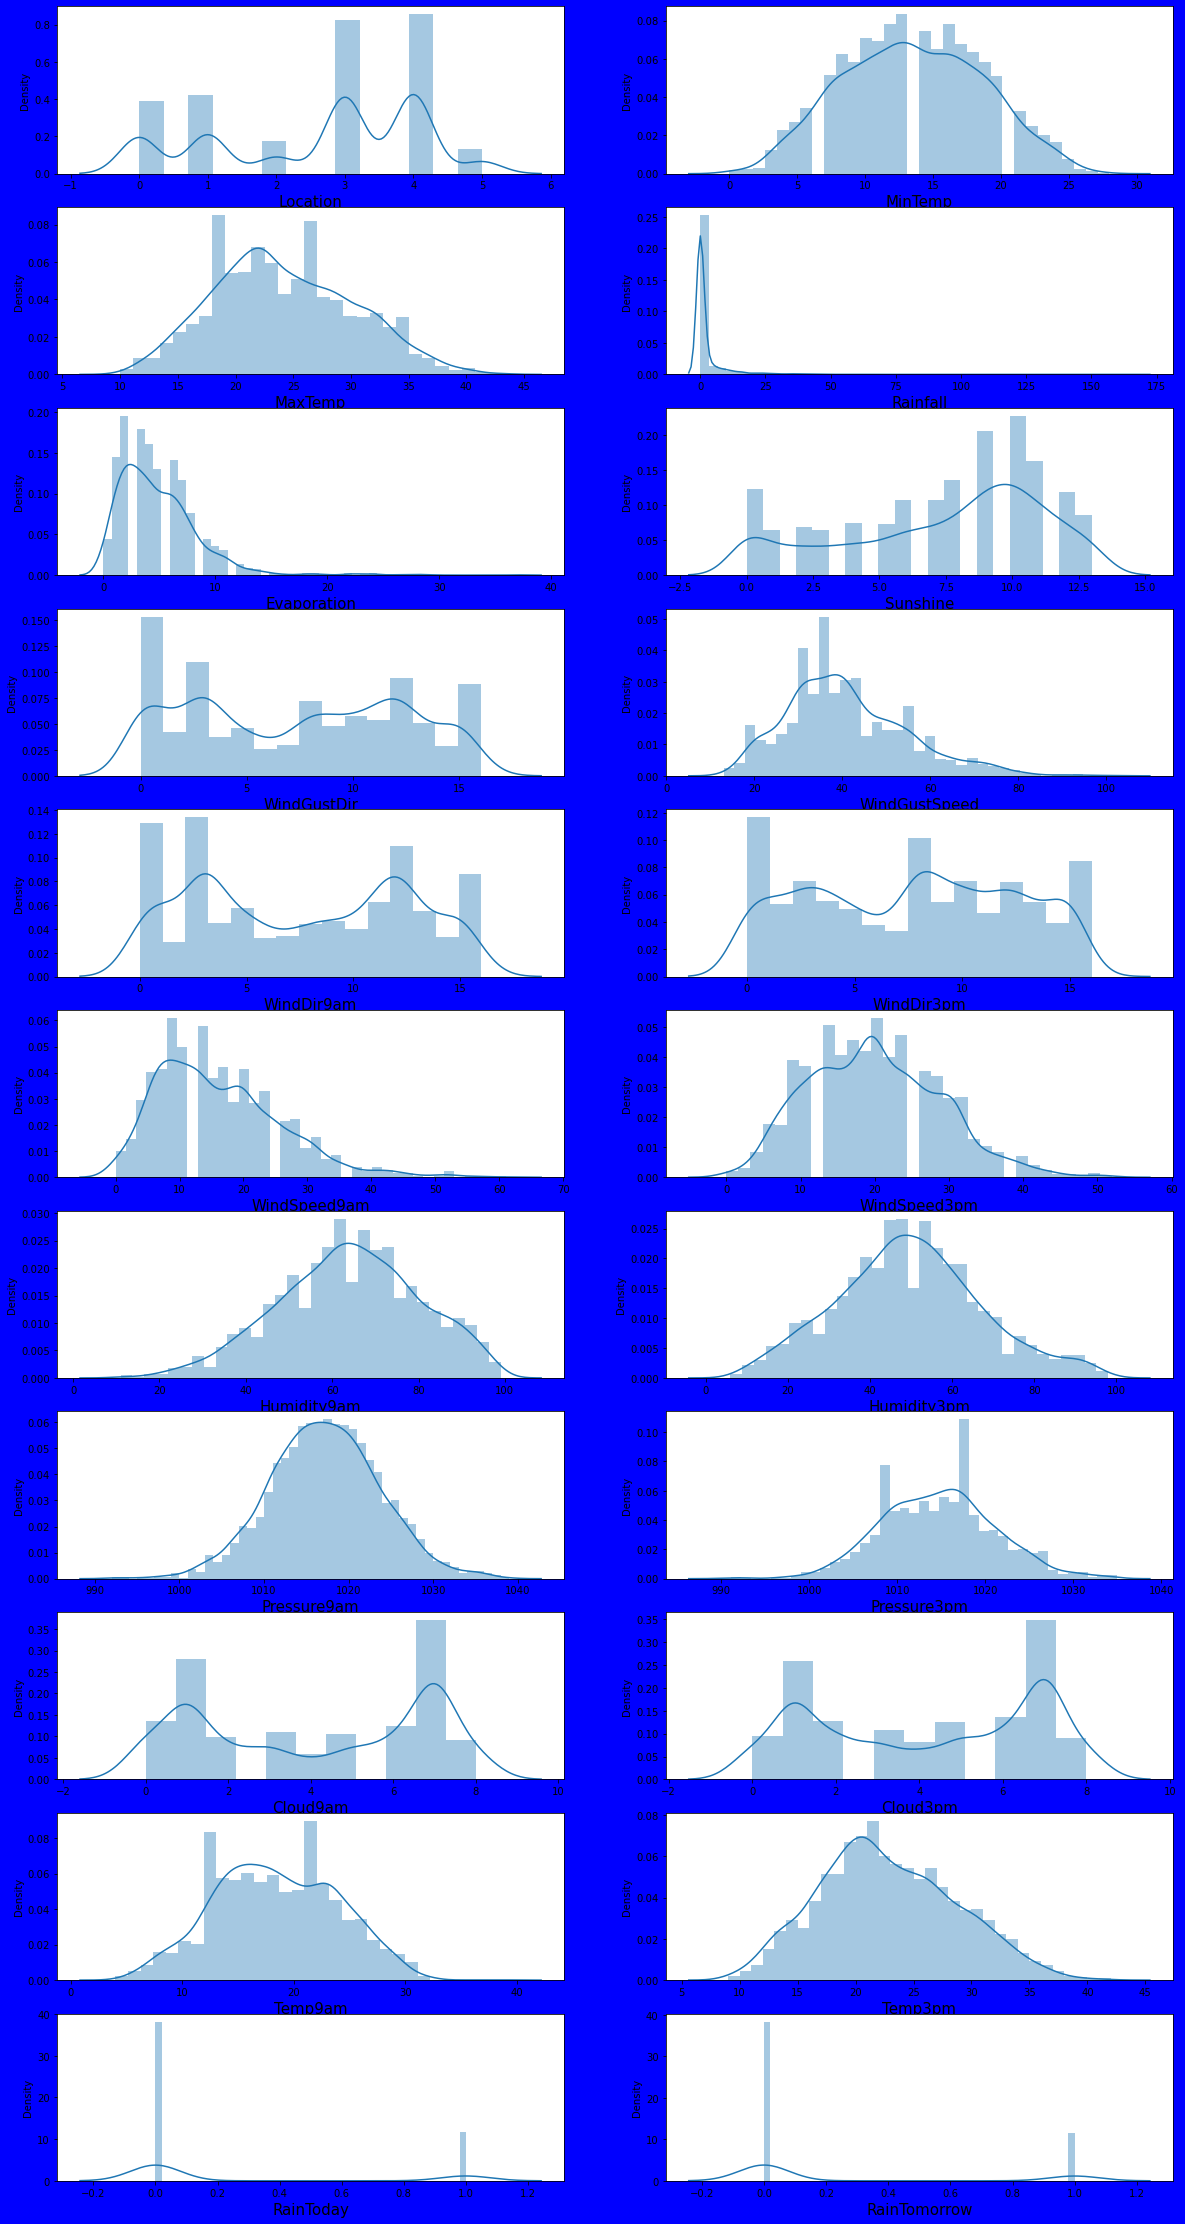

In [52]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=22 :
        ax= plt.subplot(11,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [51]:
data.shape

(3926, 22)

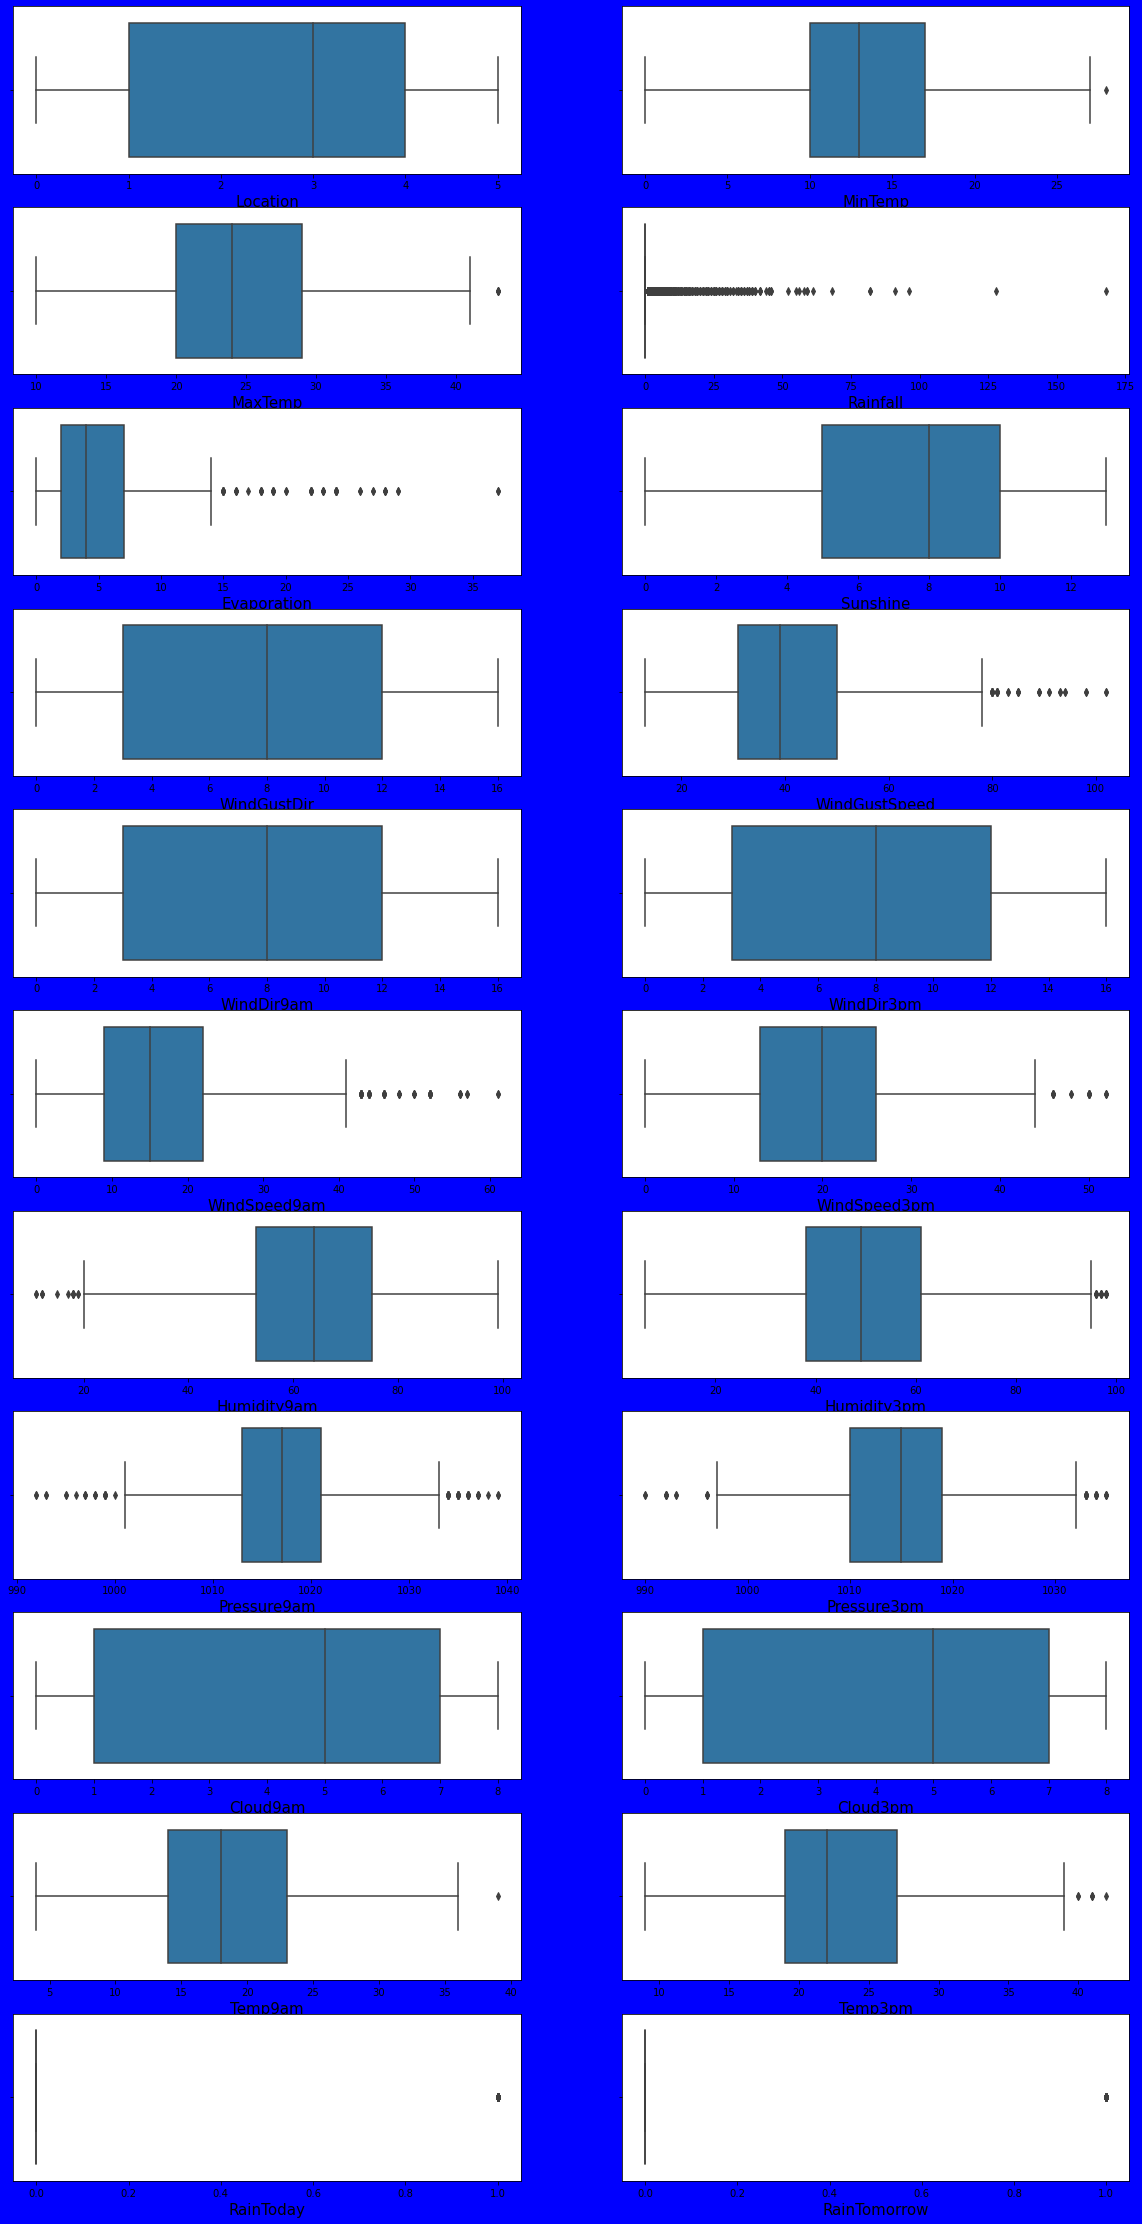

In [56]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=22 :
        ax= plt.subplot(11,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [54]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,1,19,27,24,8,9,2,35,12,2,...,83,60,1018,1017,6,6,22,26,1,1
908,1,18,25,6,3,3,0,33,12,8,...,85,90,1020,1020,4,7,21,20,1,1
909,1,16,25,16,2,6,15,19,15,2,...,84,65,1021,1020,5,7,21,24,1,0
910,1,18,26,0,3,11,1,30,12,1,...,68,60,1018,1016,2,5,23,26,0,0
911,1,18,28,0,6,9,5,50,6,4,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,2,25,34,3,4,9,5,39,3,5,...,66,46,1011,1007,7,7,29,33,1,0
8382,2,26,33,0,6,5,3,54,1,0,...,66,93,1010,1006,4,8,30,25,0,1
8383,2,24,32,20,6,8,14,37,5,7,...,72,55,1009,1006,4,6,29,32,1,0
8384,2,25,33,0,4,7,10,37,0,15,...,62,58,1011,1006,7,7,28,31,0,0


In [57]:
q1=data.quantile(0.25)
#q1 is lower Side
q3=data.quantile(0.75)
#q3 is Higher Side
iqr=q3-q1

In [58]:
Evaporation_high= (q3.Evaporation+(1.5*iqr.Evaporation))
print(Evaporation_high)

index=np.where(data['Evaporation']>Evaporation_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

14.5
(3866, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3862,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3863,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3864,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


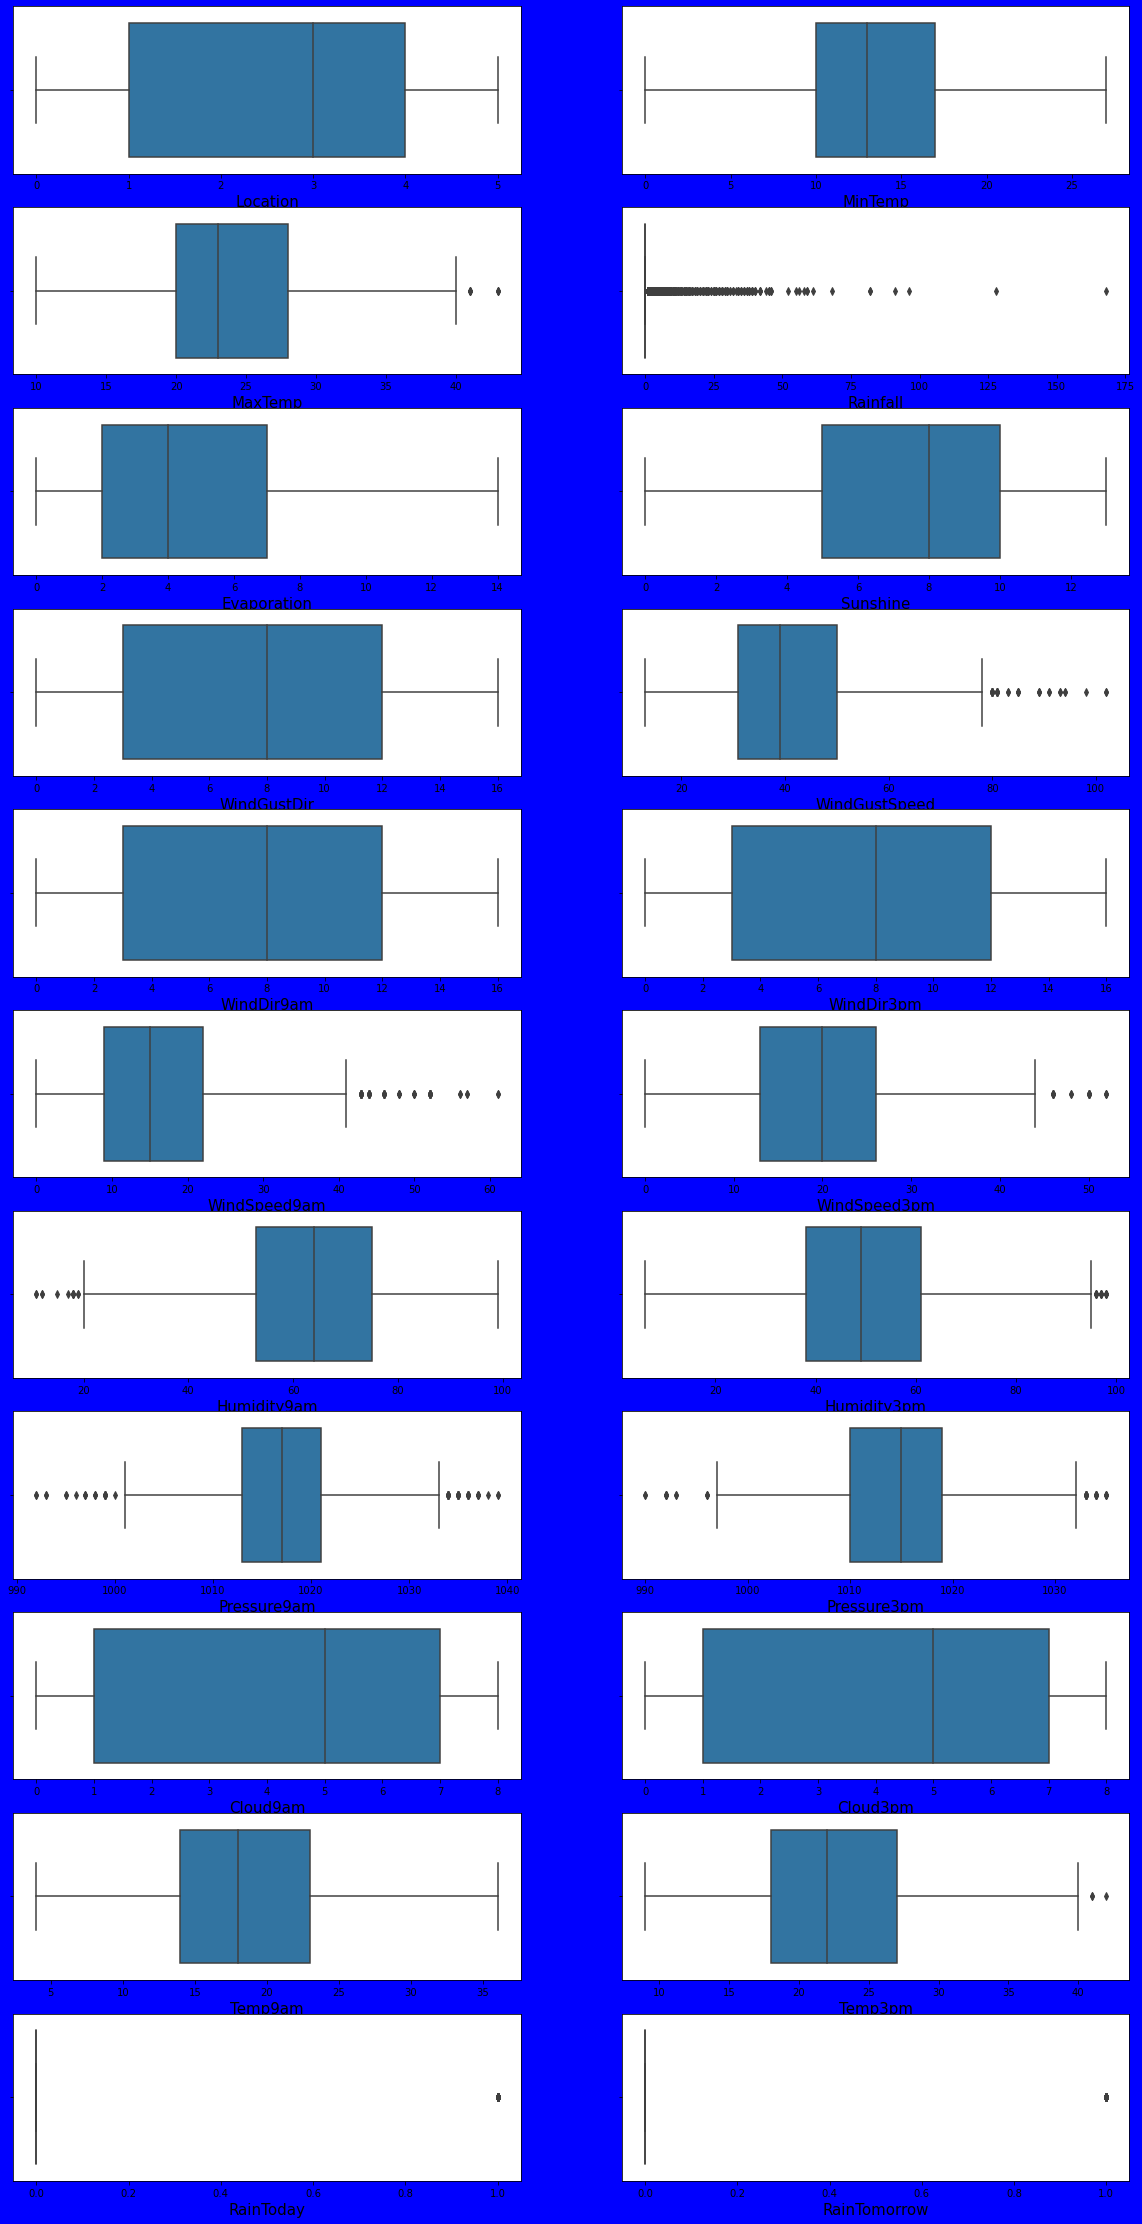

In [59]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=22 :
        ax= plt.subplot(11,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [65]:
WindGustSpeed_high= (q3.WindGustSpeed+(1.5*iqr.WindGustSpeed))
print(WindGustSpeed_high)

index=np.where(data['WindGustSpeed']>WindGustSpeed_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

78.5
(3749, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3745,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3746,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3747,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [61]:
WindSpeed9am_high= (q3.WindSpeed9am+(1.5*iqr.WindSpeed9am))
print(WindSpeed9am_high)

index=np.where(data['WindSpeed9am']>WindSpeed9am_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

41.5
(3773, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3769,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3770,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3771,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [62]:
WindSpeed3pm_high= (q3.WindSpeed3pm+(1.5*iqr.WindSpeed3pm))
print(WindSpeed3pm_high)

index=np.where(data['WindSpeed3pm']>WindSpeed3pm_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

45.5
(3762, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3758,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3759,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3760,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [63]:
Humidity9am_high= (q1.Humidity9am-(1.5*iqr.Humidity9am))
print(Humidity9am_high)

index=np.where(data['Humidity9am']<Humidity9am_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

20.0
(3749, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3745,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3746,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3747,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


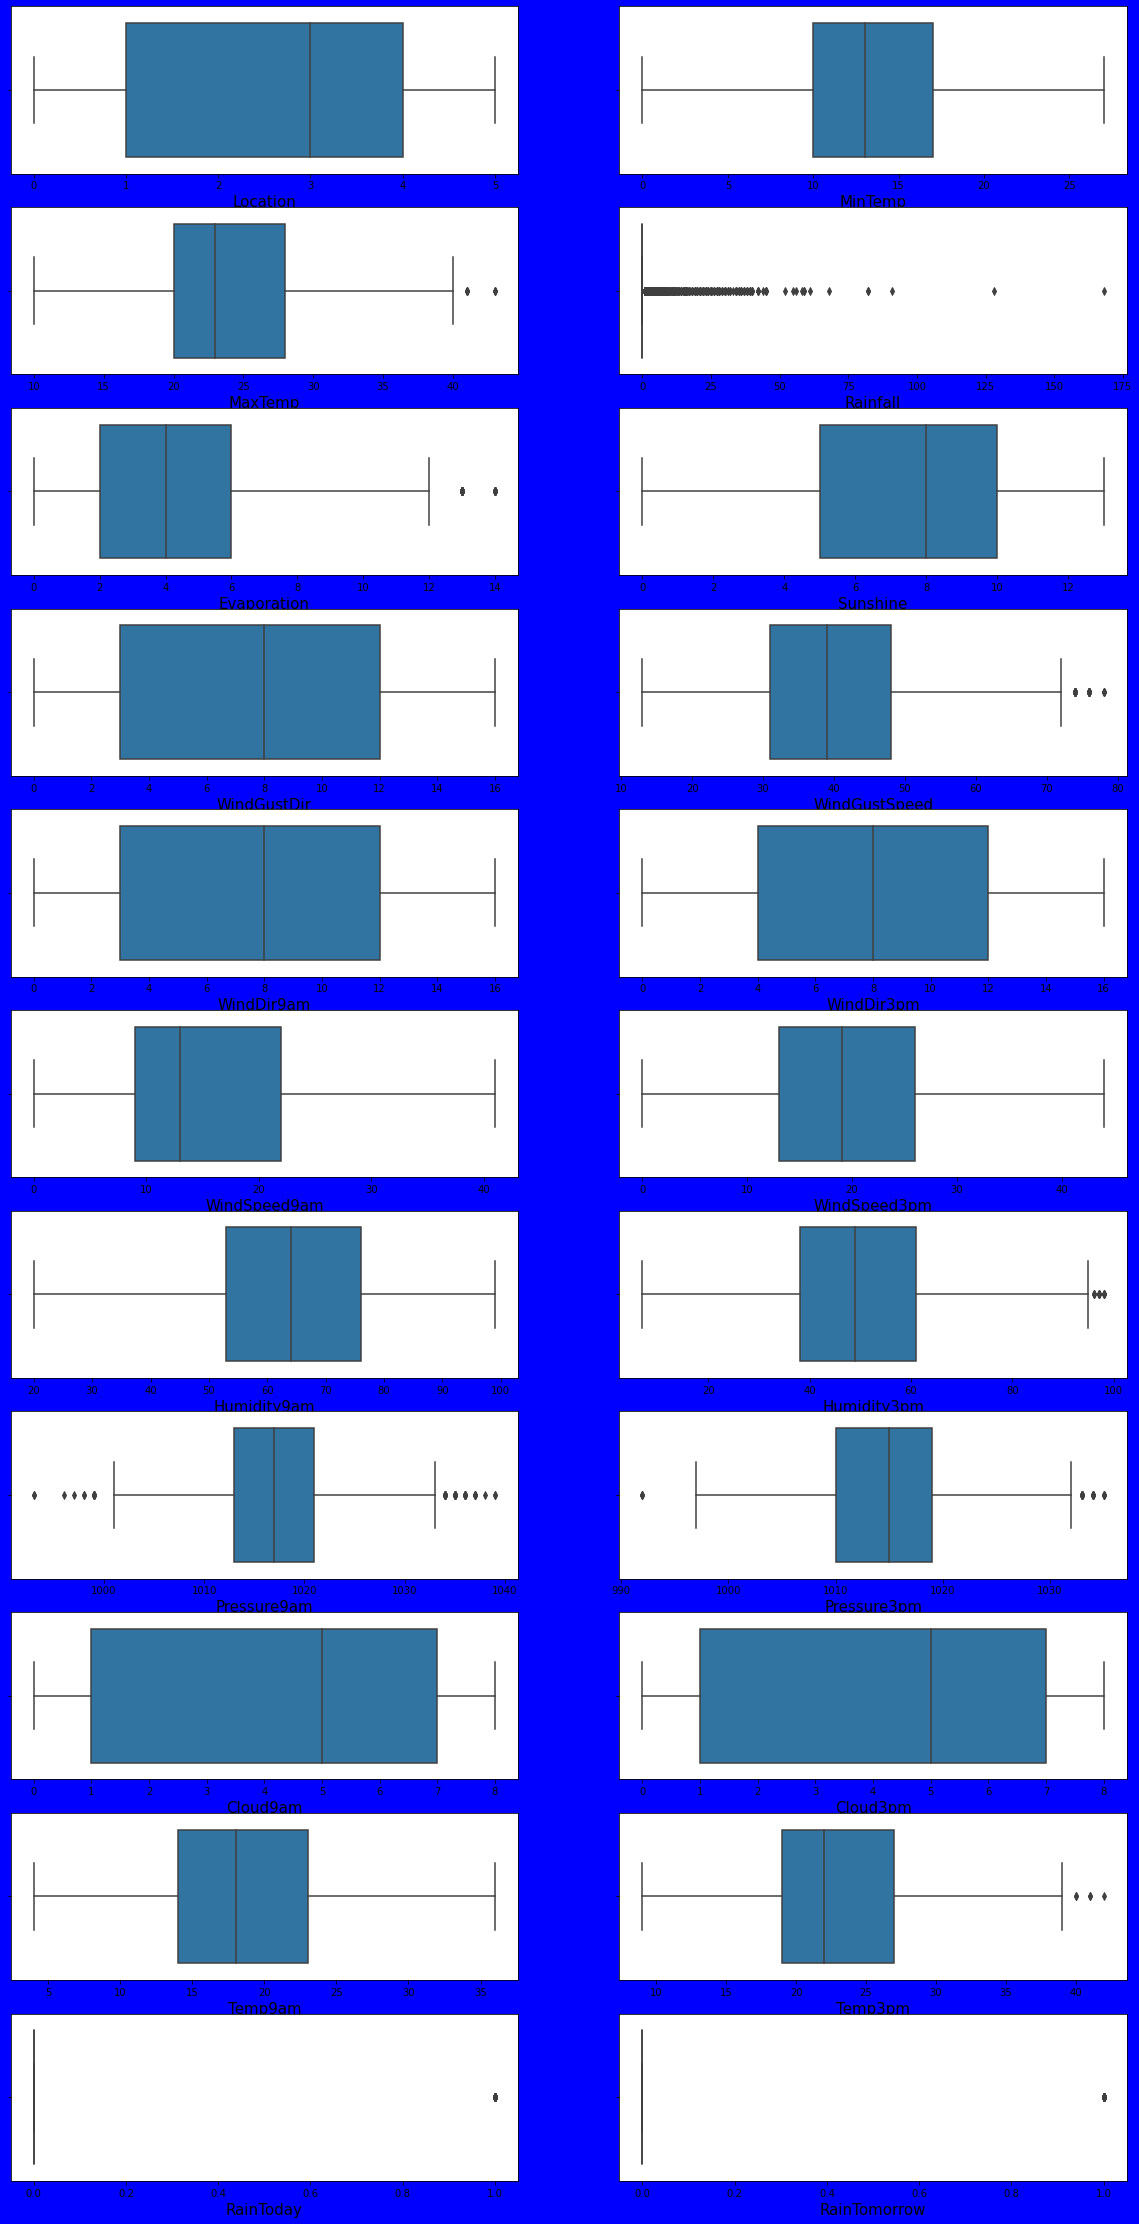

In [64]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=22 :
        ax= plt.subplot(11,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [66]:
Humidity3pm_high= (q3.Humidity3pm+(1.5*iqr.Humidity3pm))
print(Humidity3pm_high)

index=np.where(data['Humidity3pm']>Humidity3pm_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

95.5
(3737, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3733,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3734,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3735,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [67]:
Pressure9am_high= (q3.Pressure9am+(1.5*iqr.Pressure9am))
print(Pressure9am_high)

index=np.where(data['Pressure9am']>Pressure9am_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1033.0
(3696, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3692,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3693,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3694,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [68]:
Pressure3pm_high= (q3.Pressure3pm+(1.5*iqr.Pressure3pm))
print(Pressure3pm_high)

index=np.where(data['Pressure3pm']>Pressure3pm_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1032.5
(3696, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3692,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3693,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3694,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [69]:
Pressure9am_high= (q1.Pressure9am-(1.5*iqr.Pressure9am))
print(Pressure9am_high)

index=np.where(data['Pressure9am']<Pressure9am_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1001.0
(3682, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3678,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3679,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3680,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [70]:
Pressure3pm_high= (q1.Pressure3pm-(1.5*iqr.Pressure3pm))
print(Pressure3pm_high)

index=np.where(data['Pressure3pm']<Pressure3pm_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

996.5
(3682, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3678,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3679,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3680,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


In [71]:
Temp3pm_high= (q3.Temp3pm+(1.5*iqr.Temp3pm))
print(Temp3pm_high)

index=np.where(data['Temp3pm']>Temp3pm_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

39.0
(3677, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3673,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3674,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3675,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


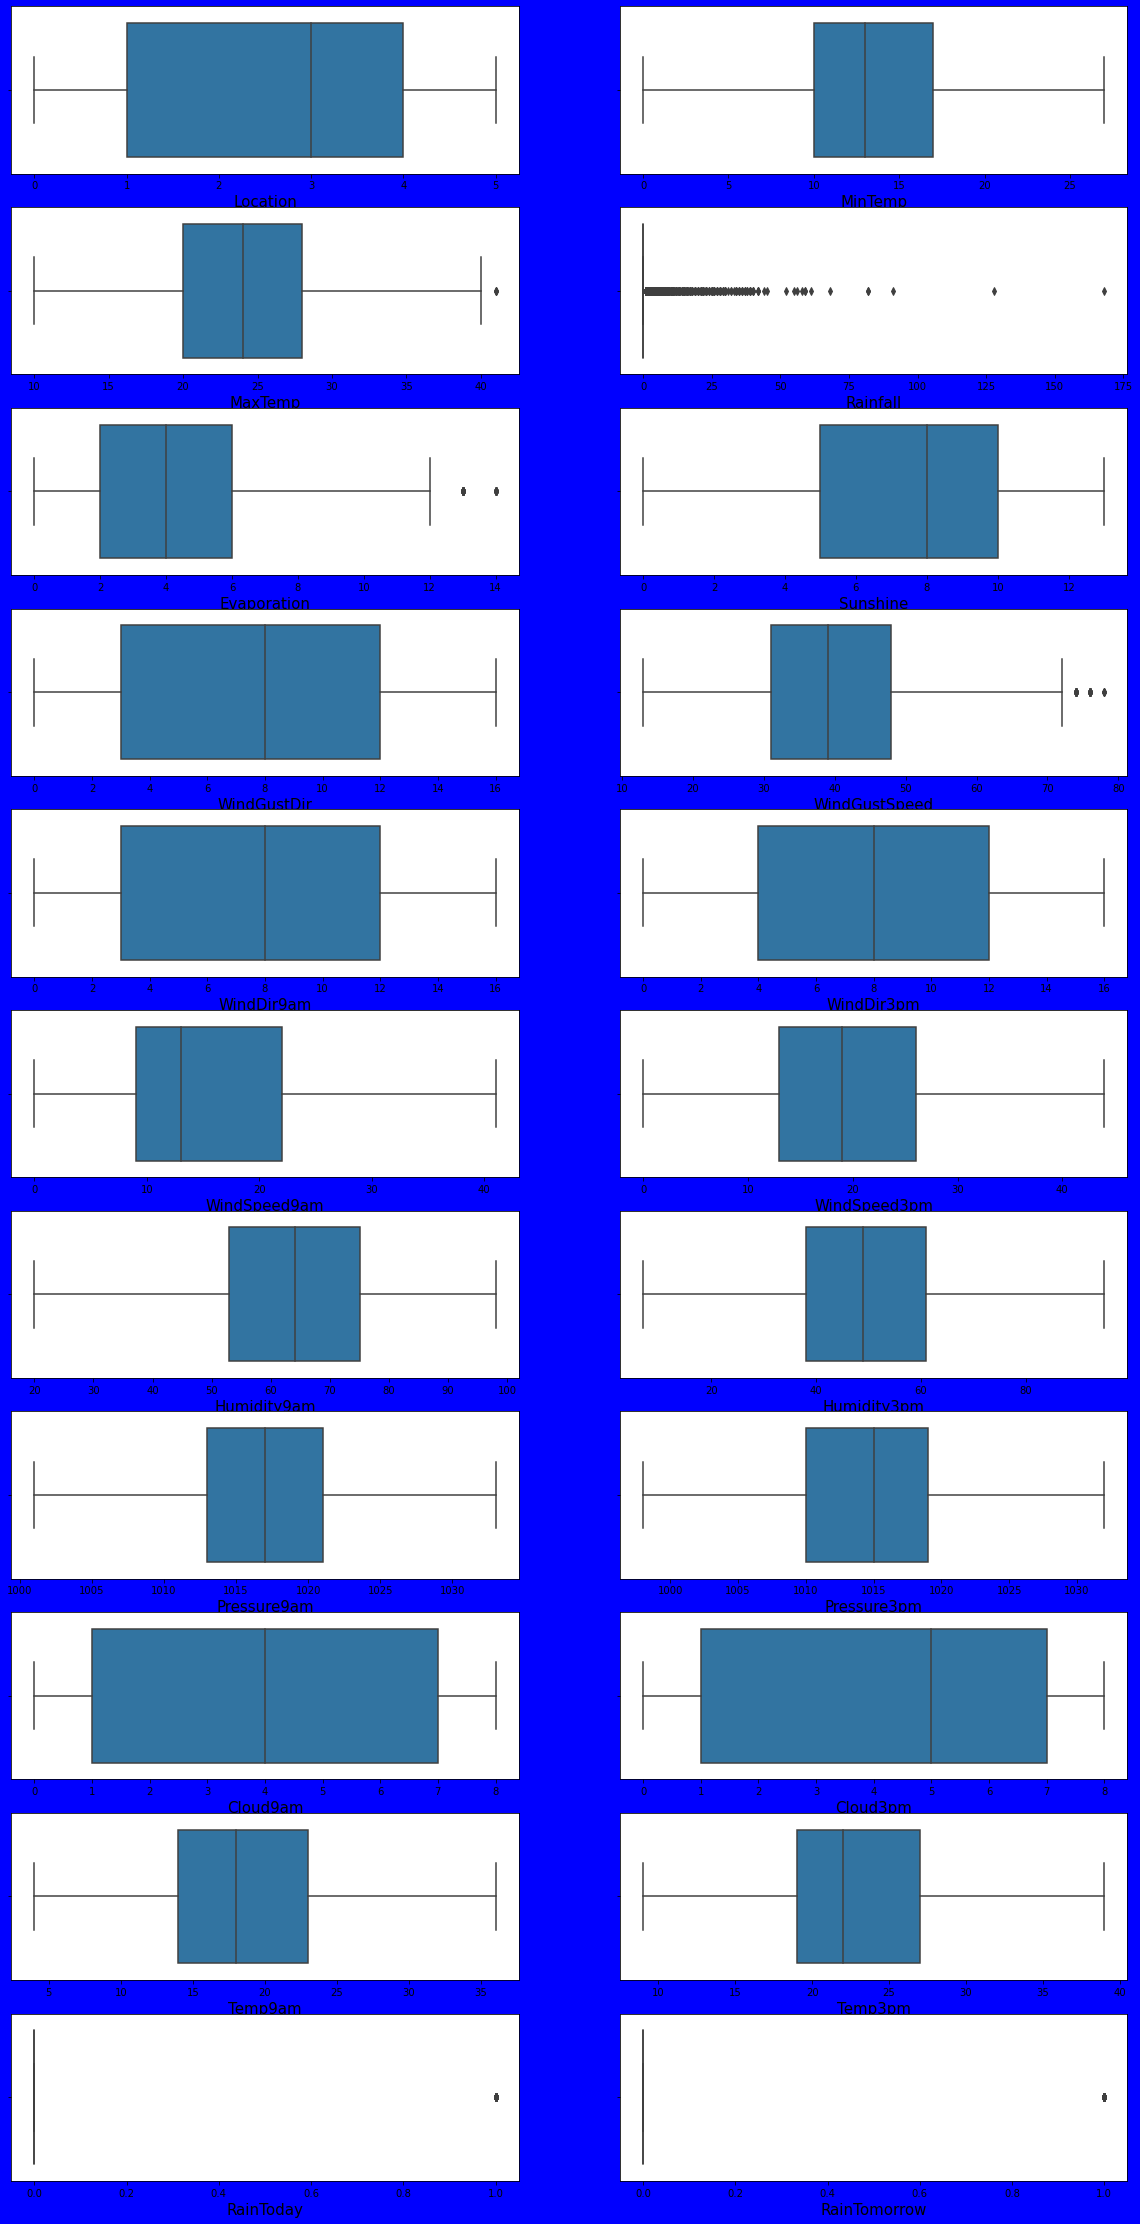

In [72]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=22 :
        ax= plt.subplot(11,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [73]:
WindGustSpeed_high= (q3.WindGustSpeed+(1.5*iqr.WindGustSpeed))
print(WindGustSpeed_high)

index=np.where(data['WindGustSpeed']>WindGustSpeed_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

78.5
(3677, 22)


,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,907,1,19,27,24,8,9,2,35,12,...,83,60,1018,1017,6,6,22,26,1,1
1,908,1,18,25,6,3,3,0,33,12,...,85,90,1020,1020,4,7,21,20,1,1
2,909,1,16,25,16,2,6,15,19,15,...,84,65,1021,1020,5,7,21,24,1,0
3,910,1,18,26,0,3,11,1,30,12,...,68,60,1018,1016,2,5,23,26,0,0
4,911,1,18,28,0,6,9,5,50,6,...,67,68,1016,1012,1,1,24,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,8381,2,25,34,3,4,9,5,39,3,...,66,46,1011,1007,7,7,29,33,1,0
3673,8382,2,26,33,0,6,5,3,54,1,...,66,93,1010,1006,4,8,30,25,0,1
3674,8383,2,24,32,20,6,8,14,37,5,...,72,55,1009,1006,4,6,29,32,1,0
3675,8384,2,25,33,0,4,7,10,37,0,...,62,58,1011,1006,7,7,28,31,0,0


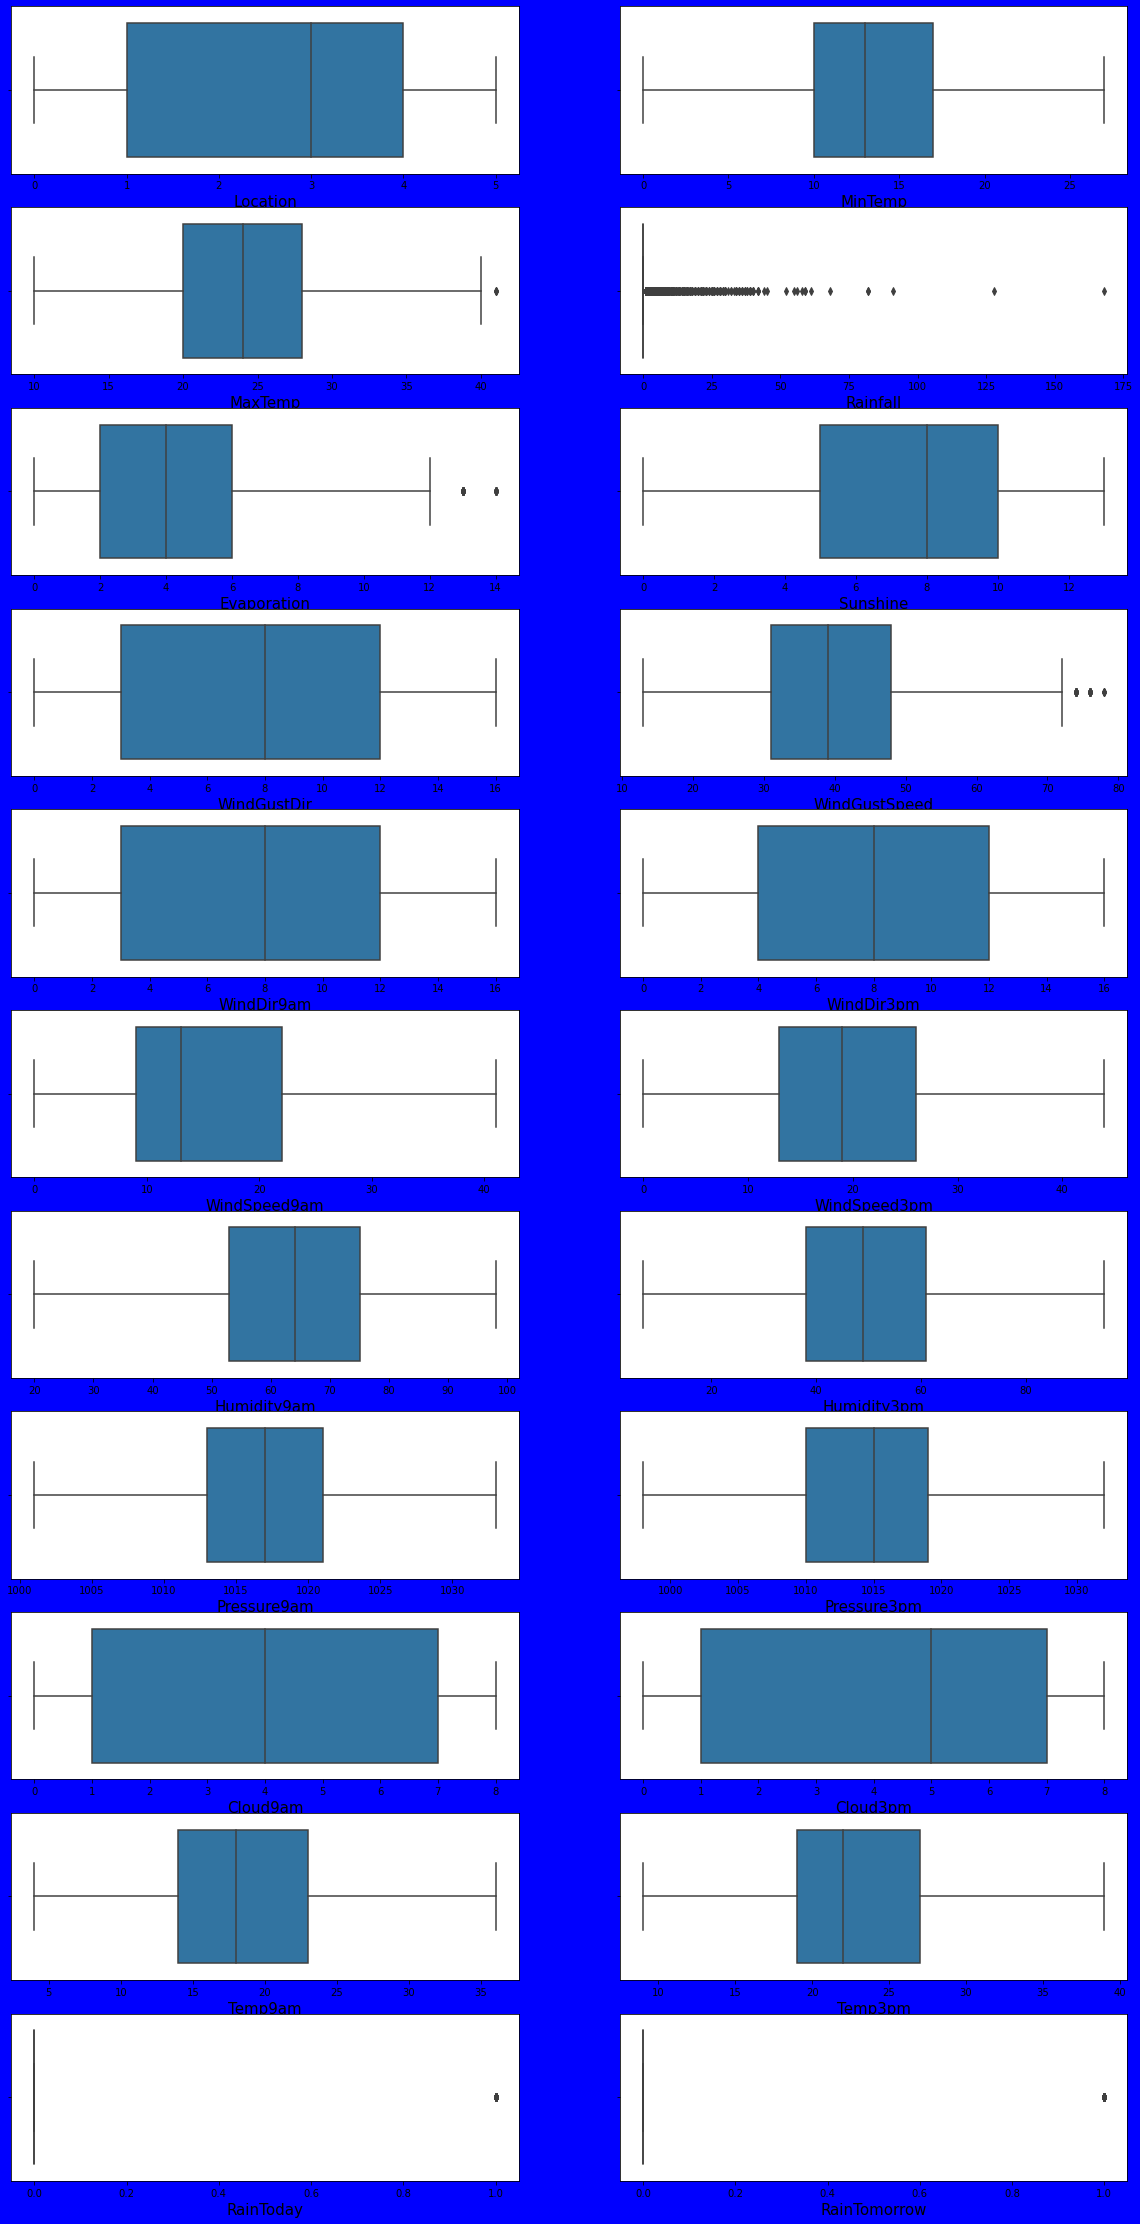

In [74]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=22 :
        ax= plt.subplot(11,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [75]:
x=data.drop(columns=['RainTomorrow'])
y=data['RainTomorrow']

In [76]:
scalar=StandardScaler()
x_scaled= scalar.fit_transform(x)

In [77]:
x_scaled.shape

(3677, 21)

In [78]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=264)

In [79]:
LR=LogisticRegression()

In [80]:
LR.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred=LR.predict(x_test)

In [82]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8782608695652174

In [83]:
CF=confusion_matrix(y_test,y_pred)
CF

array([[695,  26],
       [ 86, 113]], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       721
           1       0.81      0.57      0.67       199

    accuracy                           0.88       920
   macro avg       0.85      0.77      0.80       920
weighted avg       0.87      0.88      0.87       920



In [85]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.7658890848138056

In [88]:
a=data.drop(columns=['Rainfall'])
b=data['Rainfall']

In [89]:
scalar=StandardScaler()
a_scaled= scalar.fit_transform(a)

In [90]:
a_train,a_test,b_train,b_test=train_test_split(a_scaled,b,test_size=0.30,random_state=6564)

In [91]:
lr=LinearRegression()
lr.fit(a_train,b_train)

LinearRegression()

In [92]:
lr.score(a_train,b_train)

0.3356352872771684

In [93]:
lr.score(a_test,b_test)

0.30787114400052207

In [96]:
b_pred=lr.predict(a_test)

In [97]:
mean_absolute_error(b_test,b_pred)

2.5481773631740032

In [98]:
mean_squared_error(b_test,b_pred)

45.70973786784284

In [99]:
np.sqrt(mean_squared_error(b_test,b_pred))

6.760897711683178